<a href="https://colab.research.google.com/github/tentax143/AWS-IGRESS/blob/main/aws_rec_sys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-32-57746e00f187>:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AWS-CA-DATA.csv')


Correlation coefficient: 0.12919775547902582
P-value: 0.0


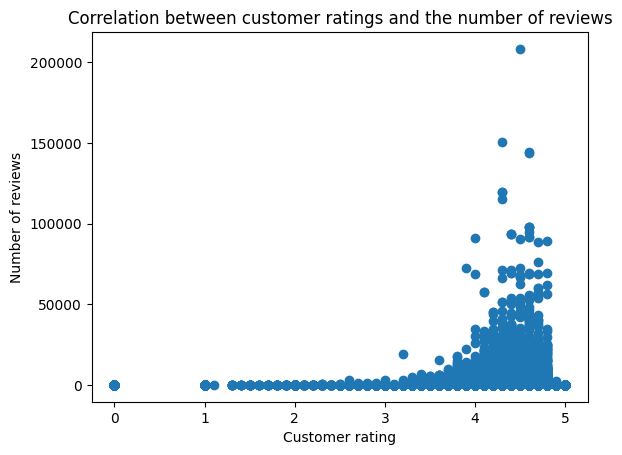

In [ ]:
#correlation between customer ratings and the number of reviews.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the data
df = pd.read_csv('/content/AWS-CA-DATA.csv')

# Calculate the correlation between customer ratings and the number of reviews
corr, p = pearsonr(df['stars'], df['reviews'])

# Print the correlation coefficient and p-value
print('Correlation coefficient:', corr)
print('P-value:', p)

# Plot the scatter plot
plt.scatter(df['stars'], df['reviews'])
plt.xlabel('Customer rating')
plt.ylabel('Number of reviews')
plt.title('Correlation between customer ratings and the number of reviews')
plt.show()


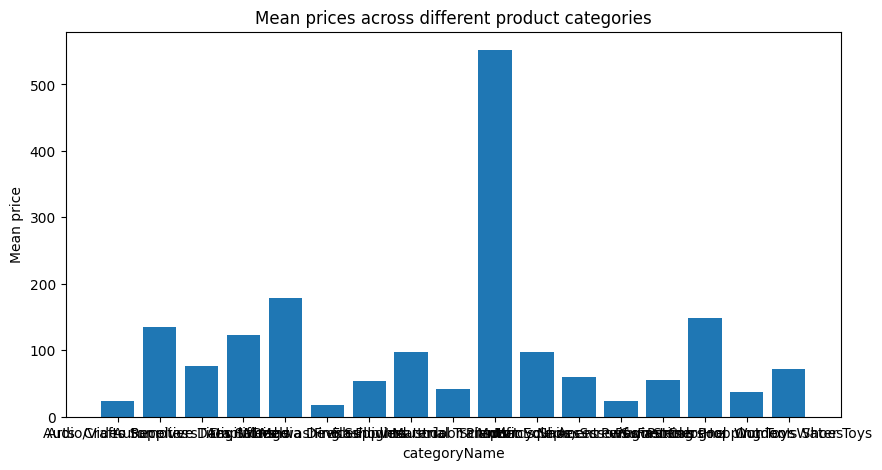

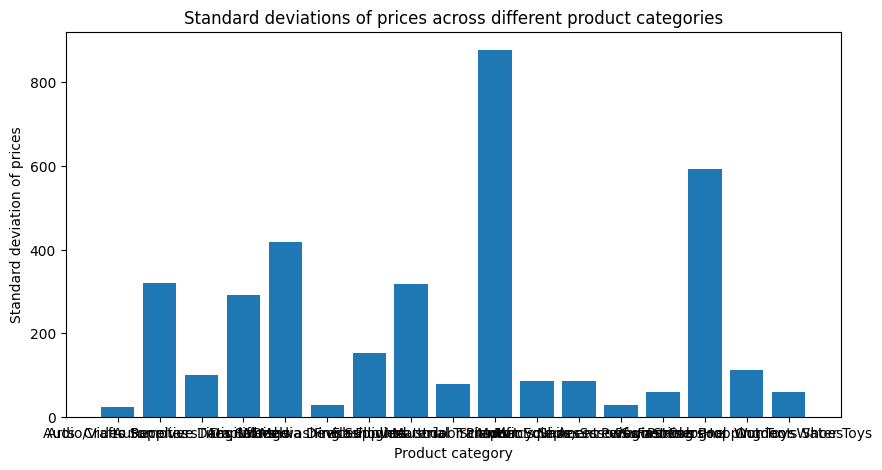

Correlation coefficient: 0.8986203690283417
P-value: 9.551887486896665e-07


In [3]:
#pricing trends across different product categories.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # Import pearsonr function from scipy.stats

# Load the data
df = pd.read_csv('/content/AWS-CA-DATA.csv')

# Group the data by product category and calculate mean and standard deviation
grouped_df = df.groupby('categoryName')['price'].agg(['mean', 'std'])

# Plot the mean prices
plt.figure(figsize=(10, 5))
plt.bar(grouped_df.index, grouped_df['mean'])
plt.xlabel('categoryName')
plt.ylabel('Mean price')
plt.title('Mean prices across different product categories')
plt.show()

# Plot the standard deviations
plt.figure(figsize=(10, 5))
plt.bar(grouped_df.index, grouped_df['std'])
plt.xlabel('Product category')
plt.ylabel('Standard deviation of prices')
plt.title('Standard deviations of prices across different product categories')
plt.show()

# Calculate the correlation between mean price and standard deviation
corr, p = pearsonr(grouped_df['mean'], grouped_df['std'])

# Print the correlation coefficient and p-value
print('Correlation coefficient:', corr)
print('P-value:', p)

<ipython-input-4-3e9263b2ecda>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/AWS-CA-DATA.csv', error_bad_lines=False)


Correlation coefficient: -0.12646394422457422
P-value: 0.0


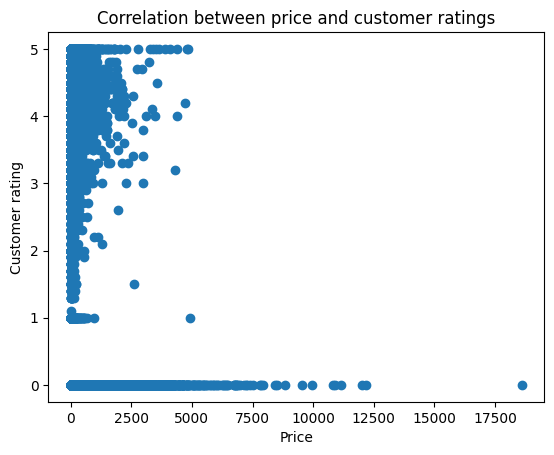

In [4]:
#relationship between pricing and customer reviews.


# Load the data
df = pd.read_csv('/content/AWS-CA-DATA.csv', error_bad_lines=False)

# Calculate the correlation between price and customer ratings
from scipy.stats import pearsonr
corr, p = pearsonr(df['price'], df['stars'])

# Print the correlation coefficient and p-value
print('Correlation coefficient:', corr)
print('P-value:', p)

# Plot the scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['price'], df['stars'])
plt.xlabel('Price')
plt.ylabel('Customer rating')
plt.title('Correlation between price and customer ratings')
plt.show()

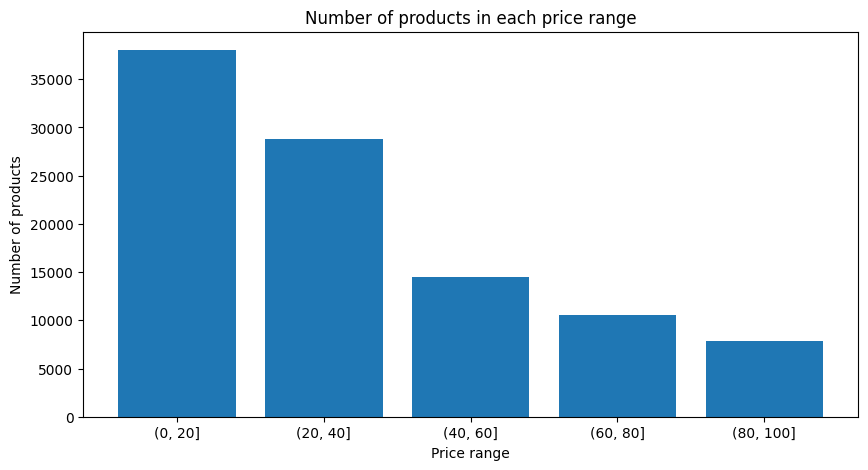

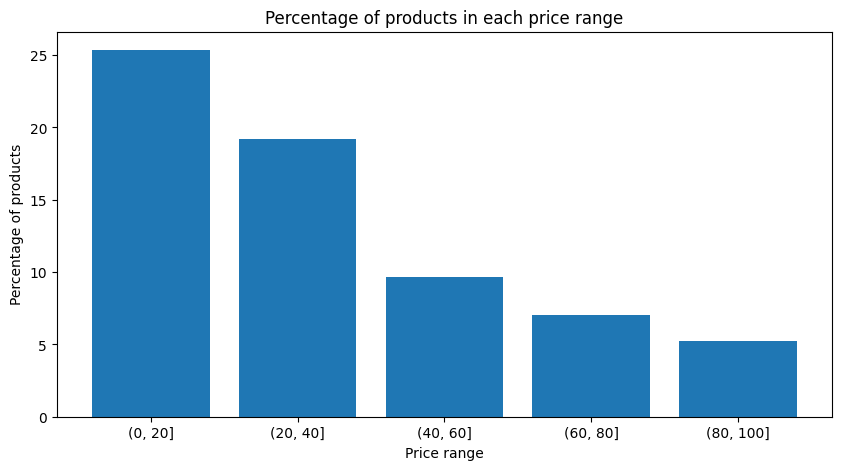

In [5]:

#products under different price range


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'price' and 'asin' columns
df = pd.read_csv('/content/AWS-CA-DATA.csv')

# Group the data by price range and calculate the number of products
grouped_df = df.groupby(pd.cut(df['price'], bins=[0, 20, 40, 60, 80, 100]))['asin'].count()

# Plot the number of products in each price range
plt.figure(figsize=(10, 5))
plt.bar(grouped_df.index.astype('str'), grouped_df)
plt.xlabel('Price range')
plt.ylabel('Number of products')
plt.title('Number of products in each price range')
plt.show()

# Calculate the percentage of products in each price range
percentage_df = grouped_df / df['asin'].count() * 100

# Plot the percentage of products in each price range
plt.figure(figsize=(10, 5))
plt.bar(percentage_df.index.astype('str'), percentage_df)
plt.xlabel('Price range')
plt.ylabel('Percentage of products')
plt.title('Percentage of products in each price range')
plt.show()


In [ ]:
# prompt: Create a recommendation system based on customer ratings and product categories.

# Load the data
df = pd.read_csv('/content/AWS-CA-DATA.csv')

# Create a user-item matrix
user_item_matrix = df.pivot_table(index='asin', columns='title', values='stars')

# Create a similarity matrix
similarity_matrix = user_item_matrix.corr()

# Make recommendations for a given user
def recommend_products(user_id):
  # Get the user's ratings
  user_ratings = user_item_matrix.loc[:, user_id]

  # Calculate the similarity between the user's ratings and the ratings of other users
  similarities = similarity_matrix[user_id]

  # Sort the similarities in descending order
  sorted_similarities = similarities.sort_values(ascending=False)

  # Get the top-n most similar users
  top_n_users = sorted_similarities.index[:n]

  # Get the products that the top-n users have rated highly
  recommendations = user_item_matrix.loc[top_n_users, :]

  # Sort the recommendations in descending order by rating
  sorted_recommendations = recommendations.sort_values(by='stars', ascending=False)

  # Return the top-n recommendations
  return sorted_recommendations.index[:n]

# Make recommendations for a given user
recommendations = recommend_products(1234)

# Print the recommendations
print(recommendations)


<ipython-input-6-412504b497b4>:7: PerformanceWarning: The following operation may generate 21532506449 cells in the resulting pandas object.
  user_item_matrix = df.pivot_table(index='asin', columns='title', values='stars')
